#### Check Duplicate Records

#### Drop Duplicate Records

#### Check missing or null values

#### Drop missing or null values

#### Show top 10 average MSRP (Price) per car brand (rounded figure)?

#### Show the average MSRP (price) per years (rounded figure)?

#### Show average Engine HP (power) rounded figure and MPG (efficiency) rounded figure per year?

Hint: Average of (city mpg + highway MPG)

#### What percentage of cars are Compact, Midsize, or Large?

#### Which vehicle styles are the most sold (most common) in the dataset?

#### Which car brands have the most vehicles priced at $40,000 or more and with a popularity score of at least 1000?

#### Check if there are outliers in Engine HP show boxplot

#### Check if there are outliers in Engine Cylinder show boxplot

#### Find upper bound, lower bound, number of outliers in Engine HP

#### Fill missing values in Number of Doors column with median value then check if values are filled

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cars.csv")

In [4]:
duplicate_records = df[df.duplicated()]
print("Duplicate Records:\n", duplicate_records)

Duplicate Records:
          Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14                  6.

In [5]:
df = df.drop_duplicates()
print("Duplicates dropped. Remaining rows:", len(df))

Duplicates dropped. Remaining rows: 11199


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [7]:
df_dropna = df.dropna()
print("\nRows after dropping missing values:", len(df_dropna))



Rows after dropping missing values: 7735


In [8]:
avg_msrp_brand = df.groupby('Make')['MSRP'].mean().round().sort_values(ascending=False).head(10)
print("\nTop 10 Average MSRP per Brand:\n", avg_msrp_brand)


Top 10 Average MSRP per Brand:
 Make
Bugatti         1757224.0
Maybach          546222.0
Rolls-Royce      351131.0
Lamborghini      331567.0
Bentley          247169.0
McLaren          239805.0
Ferrari          238219.0
Spyker           214990.0
Aston Martin     198123.0
Maserati         113684.0
Name: MSRP, dtype: float64


In [9]:
avg_msrp_year = df.groupby('Year')['MSRP'].mean().round()
print("\nAverage MSRP per Year:\n", avg_msrp_year)


Average MSRP per Year:
 Year
1990     2032.0
1991     2119.0
1992     2108.0
1993     2245.0
1994     2394.0
1995     2700.0
1996     2567.0
1997     3165.0
1998     3036.0
1999     3154.0
2000     3197.0
2001    41501.0
2002    33744.0
2003    39774.0
2004    36107.0
2005    36747.0
2006    32075.0
2007    35278.0
2008    56754.0
2009    50404.0
2010    52021.0
2011    57570.0
2012    61959.0
2013    51476.0
2014    65523.0
2015    47506.0
2016    47864.0
2017    42185.0
Name: MSRP, dtype: float64


In [10]:
avg_hp_mpg_year = df.groupby('Year')[['Engine HP', 'highway MPG']].mean().round()
print("\nAverage HP and MPG per Year:\n", avg_hp_mpg_year)


Average HP and MPG per Year:
       Engine HP  highway MPG
Year                        
1990      144.0         24.0
1991      151.0         23.0
1992      148.0         25.0
1993      155.0         25.0
1994      157.0         24.0
1995      177.0         23.0
1996      174.0         24.0
1997      185.0         22.0
1998      194.0         21.0
1999      191.0         23.0
2000      185.0         24.0
2001      194.0         24.0
2002      196.0         23.0
2003      206.0         23.0
2004      215.0         23.0
2005      219.0         24.0
2006      229.0         24.0
2007      253.0         22.0
2008      261.0         23.0
2009      254.0         24.0
2010      253.0         24.0
2011      263.0         25.0
2012      272.0         26.0
2013      277.0         27.0
2014      298.0         28.0
2015      274.0         29.0
2016      276.0         29.0
2017      275.0         29.0


In [11]:
sizes = ['Compact', 'Midsize', 'Large']
df_sizes = df[df['Vehicle Size'].isin(sizes)]
percentage = (len(df_sizes) / len(df)) * 100
print(f"\nPercentage of cars that are Compact, Midsize, or Large: {percentage:.2f}%")


Percentage of cars that are Compact, Midsize, or Large: 100.00%


In [12]:
most_common_styles = df['Vehicle Style'].value_counts().head(10)
print("\nMost Sold (Most Common) Vehicle Styles:\n", most_common_styles)


Most Sold (Most Common) Vehicle Styles:
 Vehicle Style
Sedan                  2843
4dr SUV                2434
Coupe                  1175
Convertible             741
4dr Hatchback           663
Crew Cab Pickup         655
Extended Cab Pickup     597
Wagon                   562
2dr Hatchback           412
Passenger Minivan       389
Name: count, dtype: int64


In [13]:
filtered_brands = df[(df['MSRP'] >= 40000) & (df['Popularity'] >= 1000)]
brand_counts = filtered_brands['Make'].value_counts()
print("\nBrands with most vehicles >= $40k and Popularity >= 1000:\n", brand_counts)


Brands with most vehicles >= $40k and Popularity >= 1000:
 Make
Cadillac       354
BMW            269
Audi           224
Chevrolet      216
Ford           145
Porsche        123
Toyota         120
Nissan          91
Ferrari         69
Dodge           55
Lamborghini     52
Chrysler        18
Tesla           18
Kia             17
Honda           14
Hyundai         13
Name: count, dtype: int64


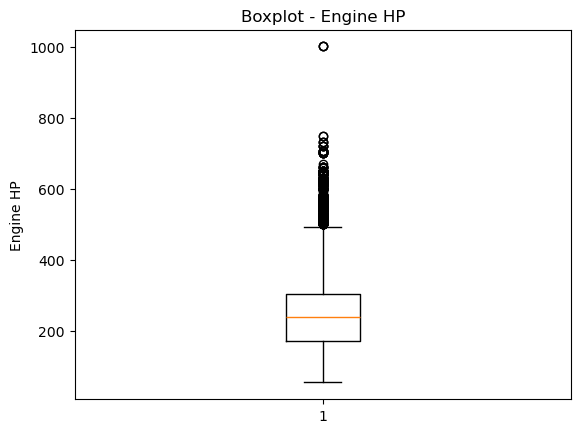

In [14]:
plt.figure()
plt.boxplot(df['Engine HP'].dropna())
plt.title("Boxplot - Engine HP")
plt.ylabel("Engine HP")
plt.show()

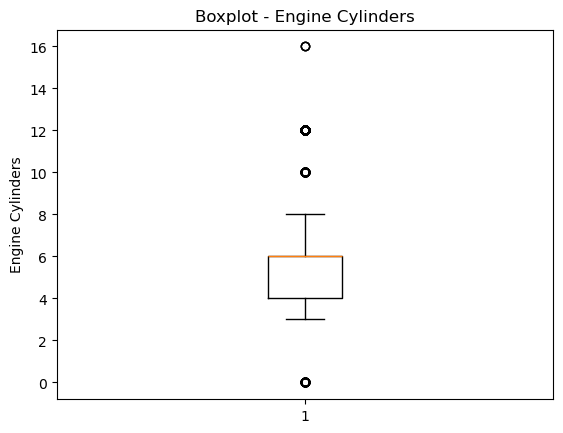

In [15]:
plt.figure()
plt.boxplot(df['Engine Cylinders'].dropna())
plt.title("Boxplot - Engine Cylinders")
plt.ylabel("Engine Cylinders")
plt.show()

In [16]:
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
outliers = df[(df['Engine HP'] < lower_bound) | (df['Engine HP'] > upper_bound)]
print("\nEngine HP Outlier Details:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", len(outliers))


Engine HP Outlier Details:
Lower Bound: -24.5
Upper Bound: 499.5
Number of Outliers: 502


In [18]:
median_doors = df['Number of Doors'].median()
df['Number of Doors'] = df['Number of Doors'].fillna(median_doors)

print("\nMissing values after filling Number of Doors:")
print(df['Number of Doors'].isnull().sum())


Missing values after filling Number of Doors:
0


C:\Users\Muhammad Ahmed\AppData\Local\Temp\ipykernel_19768\1322933935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Doors'] = df['Number of Doors'].fillna(median_doors)
